In [ ]:
! pip install brian2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 29.1 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
from brian2 import *

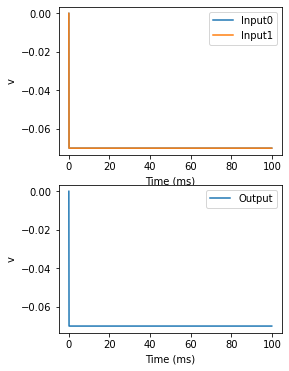

In [ ]:
# OR GATE

start_scope()

n = 3                                   
v_threshold = -0.05                  
v_reset_potential = -0.07     
refractory_period = 1*ms      

eqs = '''
dv/dt = -gl * (v0 - v)/ taum * Cm + I/ taum : 1  (unless refractory)
v0 : 1
taum: second
I : 1
Cm = 0.1: 1
gl : 1
'''

G = NeuronGroup(n, eqs, threshold='v>v_threshold', reset='v=v_reset_potential', refractory=refractory_period, method='euler')

G.v0 = [2, 2, 0]
G.taum = [20, 20, 200]*ms 
#G.I = [2, 2, 2] #input1 = 1 input2 = 1 output = 1
#G.I = [0, 2, 2]  #input1 = 0 input2 = 1 output = 1
#G.I = [2, 0, 2]  #input1 = 1 input2 = 0 output = 1
G.I = [0, 0, 0] #input1 = 0 input2 = 0 output = 0

# Synapse model, add weight parameter
syn_eqs='''
w: 1
'''
S = Synapses(G, G, syn_eqs, on_pre='v_post+=w')
S.connect(i=[0,1], j=[2,2])
S.w = '0.1'
#S.delay = 20*ms

M = StateMonitor(G, variables = True, record=True)               

run(100*ms)

figure(figsize=[4, 6])
subplot(211)
plot(M.t/ms, M.v[0], label='Input0')
plot(M.t/ms, M.v[1], label='Input1')
xlabel('Time (ms)')
ylabel('v')
legend(loc='upper right')
subplot(212)
plot(M.t/ms, M.v[2], label='Output')
xlabel('Time (ms)')
ylabel('v')
legend(loc='upper right')



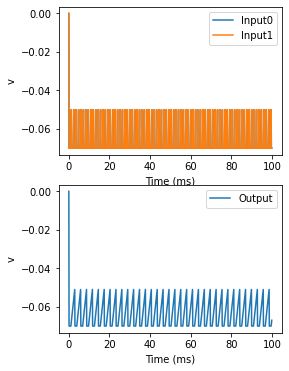

In [ ]:
# AND GATE

start_scope()

n = 3                                   
v_threshold = -0.05                  
v_reset_potential = -0.07     
refractory_period = 1*ms      

eqs = '''
dv/dt = -gl * (v0 - v)/ taum * Cm + I/ taum : 1  (unless refractory)
v0 : 1
taum: second
I : 1
Cm = 0.1: 1
gl : 1
'''

G = NeuronGroup(n, eqs, threshold='v>v_threshold', reset='v=v_reset_potential', refractory=refractory_period, method='euler')

G.v0 = [2, 2, 0]
G.taum = [20, 20, 200]*ms 
G.I = [2, 2, 2] #input1 = 1 input2 = 1 output = 1
#G.I = [0, 2, 0]  #input1 = 0 input2 = 1 output = 0
#G.I = [2, 0, 0]  #input1 = 1 input2 = 0 output = 0
#G.I = [0, 0, 0] #input1 = 0 input2 = 0 output = 0

# Synapse model, add weight parameter
syn_eqs='''
w: 1
'''
S = Synapses(G, G, syn_eqs, on_pre='v_post+=w')
S.connect(i=[0,1], j=[2,2])
S.w = '0.000001'
#S.delay = 20*ms

M = StateMonitor(G, variables = True, record=True)               

run(100*ms)
# plot each neurons

figure(figsize=[4, 6])
subplot(211)
plot(M.t/ms, M.v[0], label='Input0')
plot(M.t/ms, M.v[1], label='Input1')
xlabel('Time (ms)')
ylabel('v')
legend(loc='upper right')
subplot(212)
plot(M.t/ms, M.v[2], label='Output')
xlabel('Time (ms)')
ylabel('v')
legend(loc='upper right')


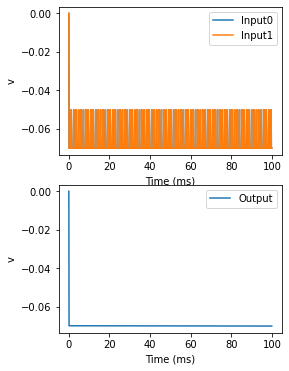

In [ ]:
# NOR GATE

start_scope()

n = 3                                   
v_threshold = -0.05                  
v_reset_potential = -0.07     
refractory_period = 1*ms      

eqs = '''
dv/dt = -gl * (v0 - v)/ taum * Cm + I/ taum : 1  (unless refractory)
v0 : 1
taum: second
I : 1
Cm = 0.1: 1
gl : 1
'''

G = NeuronGroup(n, eqs, threshold='v>v_threshold', reset='v=v_reset_potential', refractory=refractory_period, method='euler')

G.v0 = [2, 2, 0]
G.taum = [20, 20, 200]*ms 
G.I = [2, 2, 0] #input1 = 1 input2 = 1 output = 0
#G.I = [0, 2, 0]  #input1 = 0 input2 = 1 output = 0
#G.I = [2, 0, 0]  #input1 = 1 input2 = 0 output = 0
#G.I = [0, 0, 2] #input1 = 0 input2 = 0 output = 1

# Synapse model, add weight parameter
syn_eqs='''
w: 1
'''
S = Synapses(G, G, syn_eqs, on_pre='v_post+=w')
S.connect(i=[0,1], j=[2,2])
S.w = '-0.000001'
#S.delay = 20*ms

M = StateMonitor(G, variables = True, record=True)               

run(100*ms)
# plot each neurons
figure(figsize=[4, 6])
subplot(211)
plot(M.t/ms, M.v[0], label='Input0')
plot(M.t/ms, M.v[1], label='Input1')
xlabel('Time (ms)')
ylabel('v')
legend(loc='upper right')
subplot(212)
plot(M.t/ms, M.v[2], label='Output')
xlabel('Time (ms)')
ylabel('v')
legend(loc='upper right')

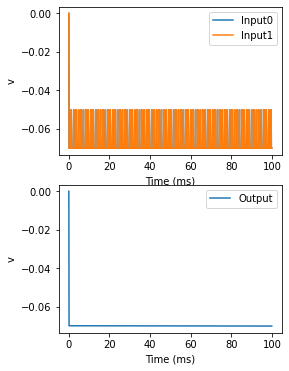

In [ ]:
# NAND GATE

start_scope()

n = 3                                   
v_threshold = -0.05                  
v_reset_potential = -0.07     
refractory_period = 1*ms      

eqs = '''
dv/dt = -gl * (v0 - v)/ taum * Cm + I/ taum : 1  (unless refractory)
v0 : 1
taum: second
I : 1
Cm = 0.1: 1
gl : 1
'''

G = NeuronGroup(n, eqs, threshold='v>v_threshold', reset='v=v_reset_potential', refractory=refractory_period, method='euler')

G.v0 = [2, 2, 0]
G.taum = [20, 20, 200]*ms 
G.I = [2, 2, 0] #input1 = 1 input2 = 1 output = 0
#G.I = [0, 2, 2]  #input1 = 0 input2 = 1 output = 1
#G.I = [2, 0, 2]  #input1 = 1 input2 = 0 output = 1
#G.I = [0, 0, 2] #input1 = 0 input2 = 0 output = 1

# Synapse model, add weight parameter
syn_eqs='''
w: 1
'''
S = Synapses(G, G, syn_eqs, on_pre='v_post+=w')
S.connect(i=[0,1], j=[2,2])
S.w = '-0.000001'
#S.delay = 20*ms

M = StateMonitor(G, variables = True, record=True)               

run(100*ms)
# plot each neurons
figure(figsize=[4, 6])
subplot(211)
plot(M.t/ms, M.v[0], label='Input0')
plot(M.t/ms, M.v[1], label='Input1')
xlabel('Time (ms)')
ylabel('v')
legend(loc='upper right')
subplot(212)
plot(M.t/ms, M.v[2], label='Output')
xlabel('Time (ms)')
ylabel('v')
legend(loc='upper right')